In [ ]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
"""
importo librerie necessarie
"""

'\nimporto librerie necessarie\n'

In [ ]:
"""
importo dataset
"""
df = pd.read_csv("https://proai-datasets.s3.eu-west-3.amazonaws.com/credit_card_customers.csv")
df.isna().sum()  ##vedo quali sono i valori nulli


,0
CUST_ID,0
BALANCE,0
BALANCE_FREQUENCY,0
PURCHASES,0
ONEOFF_PURCHASES,0
INSTALLMENTS_PURCHASES,0
CASH_ADVANCE,0
PURCHASES_FREQUENCY,0
ONEOFF_PURCHASES_FREQUENCY,0
PURCHASES_INSTALLMENTS_FREQUENCY,0


In [ ]:
"""
gestione dei valori mancanti
"""
df.dropna(subset=['CREDIT_LIMIT'], inplace=True) ##elimino righe dove CREDIT_LIMIT Non è disponibile

"""
eseguo imputazione con valore medio della colonna MINIMUM_PAYMENTS
"""
df["MINIMUM_PAYMENTS"].fillna(df["MINIMUM_PAYMENTS"].mean(), inplace=True)

"""
RIMUOVO C DA CUST_ID
"""
df["CUST_ID"] = df["CUST_ID"].str.replace("C", "")
df["CUST_ID"] = df["CUST_ID"].astype(int)

df.head()



,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.304943,0.000000,12
4,10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [ ]:
"""
eseguo standardizzazione del dataset rimuovendo la colonna CUST_ID
"""
from sklearn.preprocessing import StandardScaler

df_for_standardization = df.drop("CUST_ID", axis=1)
df_scaled_array = df_for_standardization.to_numpy()

scaler = StandardScaler()

df_scaled_array = scaler.fit_transform(df_scaled_array)
df_scaled = pd.DataFrame(df_scaled_array, columns=df.columns[1:])
df_scaled.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.732054,-0.249881,-0.424934,-0.356957,-0.349114,-0.466805,-0.806649,-0.678716,-0.707409,-0.675294,-0.476083,-0.511381,-0.960380,-0.529026,-3.109947e-01,-0.525588,0.360541
1,0.786858,0.134049,-0.469584,-0.356957,-0.454607,2.605438,-1.221928,-0.678716,-0.917090,0.573949,0.110032,-0.591841,0.688601,0.818546,8.926366e-02,0.234159,0.360541
2,0.447041,0.517980,-0.107716,0.108843,-0.454607,-0.466805,1.269742,2.673295,-0.917090,-0.675294,-0.476083,-0.109082,0.826016,-0.383857,-1.017005e-01,-0.525588,0.360541
3,0.049015,-1.017743,0.231995,0.546123,-0.454607,-0.368678,-1.014290,-0.399383,-0.917090,-0.258882,-0.329554,-0.551611,0.826016,-0.598733,4.878069e-17,-0.525588,0.360541
4,-0.358849,0.517980,-0.462095,-0.347317,-0.454607,-0.466805,-1.014290,-0.399383,-0.917090,-0.675294,-0.476083,-0.551611,-0.905414,-0.364421,-2.658206e-01,-0.525588,0.360541


In [ ]:
"""
eseguo PCA
"""
from sklearn.decomposition import PCA
# X = df # Remove this line
pca = PCA(n_components=2)
pca.fit(df_scaled_array) # Use the scaled data here
X = pca.transform(df_scaled_array) # Use the scaled data here
reduced_df = pd.DataFrame(data=X, columns=['Componente1', 'Componente2'])

In [ ]:
"""
CREO FUNZIONE PER FARE GRAFICO
E UTILIZZO KMEANS PER FARE CLUSTER
"""
RANDOM_SEED=42

def plot_ssd_curve(data):

  ssd = {}
  for k in range(1, 10):
      kmeans = KMeans(init="k-means++", n_clusters=k, random_state=RANDOM_SEED, n_init=10).fit(data)
      ssd[k] = kmeans.inertia_
  plt.figure()
  plt.plot(list(ssd.keys()), list(ssd.values()),marker='o')
  plt.xlabel("Numero di cluster", fontsize=16)
  plt.ylabel("Somma delle distanza al quadrato", fontsize=16)
  plt.show()

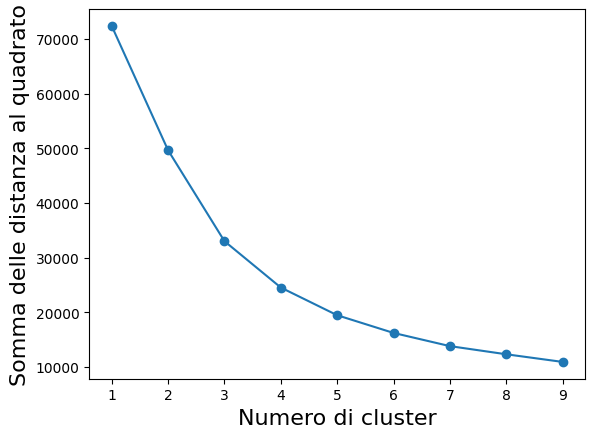

In [ ]:

plot_ssd_curve(X)

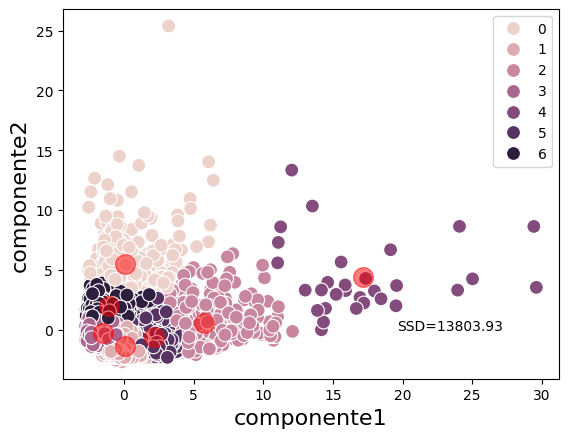

In [ ]:
def plot_clusters(model, data, axlabels=None, print_ssd=False):
  y_pred = model.predict(data)
  sns.scatterplot(x=data[:,0], y=data[:,1], hue=y_pred, s=100)
  plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], c='red', s=200, alpha=0.5)

  if axlabels!=None:
    plt.xlabel(axlabels[0], fontsize=16)
    plt.ylabel(axlabels[1], fontsize=16)

  if print_ssd:
    plt.text(X[:,0].max()-10, 0, f"SSD={model.inertia_:.2f}")

  plt.show()

kmeans = KMeans(n_clusters = 7, init = 'k-means++', random_state = RANDOM_SEED)
kmeans.fit(X)
plot_clusters(kmeans, X, axlabels=["componente1","componente2"], print_ssd=True)


In [ ]:
"""
interpretazione risultati
"""

summary = df.groupby(kmeans.predict(X)).mean()
summary.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
0,13458.894872,6259.834855,0.977403,722.574051,458.895974,263.849744,7176.980819,0.338748,0.173053,0.227945,0.603647,21.582051,10.164103,9797.051282,5854.185115,2860.765022,0.039912,11.512821,0.0
1,15144.026385,484.014388,0.855325,679.444655,279.704199,400.163294,72.262083,0.761259,0.165853,0.606624,0.018296,0.324161,13.409348,3213.905679,830.624421,437.008932,0.279298,11.519035,1.0
2,13169.370787,3525.711032,0.991292,6339.838820,4031.313315,2310.210899,698.773918,0.958853,0.738428,0.824485,0.085415,2.241573,86.797753,9379.494382,6020.119769,1911.521110,0.271186,11.966292,2.0
3,14919.273438,880.130780,0.786624,185.550021,146.510696,39.320636,482.085313,0.138917,0.067777,0.067547,0.104635,1.800781,2.170099,2858.499053,762.098270,524.776643,0.043967,11.363281,3.0
4,12312.066667,5972.475642,0.957273,24760.844667,17898.240667,6862.604000,1940.326130,0.910556,0.768333,0.757222,0.108333,4.533333,149.033333,16136.666667,25089.469515,3666.115445,0.447854,11.933333,4.0


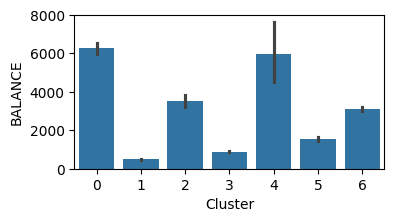

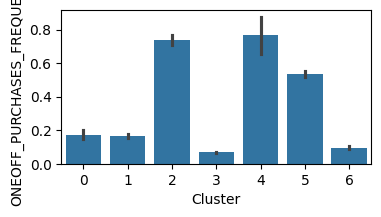

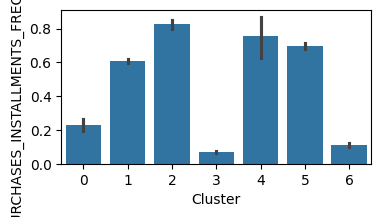

In [ ]:
"""
spese medie: bilancio, acquisti in unica soluzione, acquisti a rate
"""
df["Cluster"] = kmeans.predict(X)

spese_medie = ["BALANCE", "ONEOFF_PURCHASES_FREQUENCY","PURCHASES_INSTALLMENTS_FREQUENCY"]

for feature in spese_medie:
    plt.figure(figsize=(4, 2))
    sns.barplot(x='Cluster', y=feature, data=df)
    plt.xlabel('Cluster')
    plt.ylabel(feature)
    plt.show()

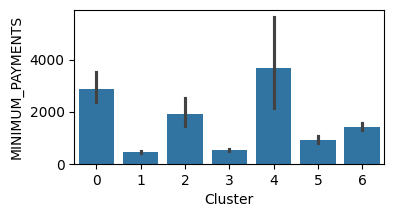

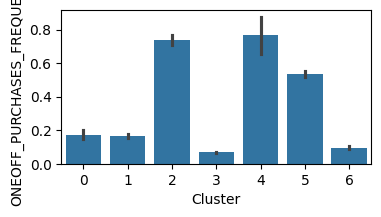

In [ ]:
"""
Abitudini di pagamento (percentuale di pagamenti minimi, pagamenti completi)
"""
abitudini_pagamenti = ["MINIMUM_PAYMENTS", "ONEOFF_PURCHASES_FREQUENCY" ]
for feature in abitudini_pagamenti:
    plt.figure(figsize=(4, 2))
    sns.barplot(x='Cluster', y=feature, data=df)
    plt.xlabel('Cluster')
    plt.ylabel(feature)
    plt.show()

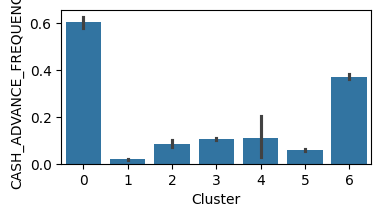

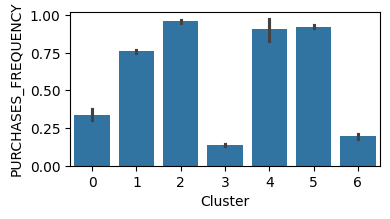

In [ ]:
"""
Frequenza di utilizzo della carta (anticipi in contanti, frequenza degli acquisti).
"""
card_frequency = ["CASH_ADVANCE_FREQUENCY", "PURCHASES_FREQUENCY"]
for feature in card_frequency:
    plt.figure(figsize=(4, 2))
    sns.barplot(x='Cluster', y=feature, data=df)
    plt.xlabel('Cluster')

In [ ]:
print("""Cluster 0: Saldo medio elevato, anticipo di contante elevato. Potrebbero essere clienti che fanno molto affidamento sugli anticipi di contante e mantengono saldi elevati.
Strategia: Promozioni per incentivare l'utilizzo del saldo, come ad esempio sconti su acquisti rateali e sugli anticipi in contante.

Cluster 1: Saldo e anticipo di contante relativamente bassi, acquisti moderati (sia singoli che a rate) e buona frequenza di acquisto. Sembrano clienti regolari che effettuano una varietà di acquisti.
Strategia: Offerte mirate per i clienti regolari che effettuano acquisti diversi. Sconti su acquisti singoli e promozioni per acquisti a rate.

Cluster 2: Acquisti medi elevati, in particolare acquisti singoli, e alta frequenza di acquisto. Potrebbero essere clienti che effettuano frequentemente acquisti singoli di importo maggiore.
Strategia: offerte sugli acquisti singoli di importo elevato

Cluster 3: Saldi e acquisti bassi, bassa frequenza di acquisti e anticipi di contante. Potrebbero essere clienti non interessati al prodotto o che preferiscono altri metodi di pagamento.
Strategia: promozione per incentivare l'utilizzo della carta e degli acquisti.

Cluster 4: Acquisti medi molto elevati, sia singoli che a rate, limiti di credito e pagamenti molto elevati. È probabile che siano clienti ad alta spesa, di tipo premium.
Strategia: Poterbbero essere clienti premium quindi prevedere offerte speciali riservate, sconti per parenti o conoscenti che decidono di acquistare la carta

Cluster 5: Saldo e acquisti moderati (misto di singoli e a rate), alta frequenza di acquisto. Potrebbero essere clienti attivi che usano regolarmente i servizi offerti.
Strategia: Il saldo residuo sul conto non sembra essere elevato, promuovere la carta con offerte in particolare per acquisti a rate

Cluster 6: Saldo moderato, acquisti bassi e alta frequenza di anticipo di contante. Sembrano clienti che non effettuano particolari acquisti e preferiscono il contante.
Strategia: simile a quella del cluster 0, acquisto carta per incentivare l'utilizzo del saldo e l'anticipo contante.

""")

Cluster 0: Saldo medio elevato, anticipo di contante elevato. Potrebbero essere clienti che fanno molto affidamento sugli anticipi di contante e mantengono saldi elevati.
Strategia: Promozioni per incentivare l'utilizzo del saldo, come ad esempio sconti su acquisti rateali e sugli anticipi in contante.

Cluster 1: Saldo e anticipo di contante relativamente bassi, acquisti moderati (sia singoli che a rate) e buona frequenza di acquisto. Sembrano clienti regolari che effettuano una varietà di acquisti.
Strategia: Offerte mirate per i clienti regolari che effettuano acquisti diversi. Sconti su acquisti singoli e promozioni per acquisti a rate.

Cluster 2: Acquisti medi elevati, in particolare acquisti singoli, e alta frequenza di acquisto. Potrebbero essere clienti che effettuano frequentemente acquisti singoli di importo maggiore.
Strategia: offerte sugli acquisti singoli di importo elevato

Cluster 3: Saldi e acquisti bassi, bassa frequenza di acquisti e anticipi di contante. Potrebbero